# <center> TP Bandit Monchot </center>

### Source code :

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 29 16:06:31 2016

@author: claire
"""
import numpy as np
from random import random, randint
# from random import betavariate
from math import log
import seaborn as sns
%matplotlib inline

In [16]:
def eGreedy(n_arms, epsilon, rewards, draws):
    if np.sum(draws == 0) > 0:
            c = np.where(draws == 0)[0][0]
    else:
        u = random()
        if u < epsilon:
            c = randint(0, n_arms - 1)
        else:
            indices = rewards / draws
            winners = np.argwhere(indices == np.max(indices))
            c = np.random.choice(winners[0])
    return c

In [17]:
def UCB(t, alpha, rewards, draws):
    if np.sum(draws == 0) > 0:
            c = np.where(draws == 0)[0][0]
    else:
        indices = rewards / draws  # TODO
        winners = np.argwhere(indices == np.max(indices))
        c = np.random.choice(winners[0])

    return c

In [18]:
def Thompson(n_arms, rewards, draws):
    indices = np.zeros(n_arms)
    for arm in np.arange(n_arms):
        indices[arm] = rewards / draws  # TODO
    winners = np.argwhere(indices == np.max(indices))
    c = np.random.choice(winners[0])
    return c

In [19]:
def kl(a, b):
    return a * log(a / b) + (1 - a) * log((1 - a) / (1 - b))

In [55]:
def computeLowerBound(n_arms, true_means):

    # TODO : use kl
    lower_bound = 0
    for i in range(1,n_arms):
        lower_bound += (true_means[0] - true_means[i]) / kl(true_means[i],true_means[0])

    return lower_bound

### Main code :

In [56]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 29 15:55:02 2016

TP Bandits Manchots

changer from source_correction import *
pour avoir les fonctions qui marchent correctement.

@author: claire
"""

import numpy as np
import matplotlib.pyplot as plt
#from source_correction import eGreedy, UCB, Thompson, computeLowerBound
from random import random

In [57]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'black']
graphic = True

horizon = 2000
time = np.arange(horizon)

# True parameters of the problem
true_means = np.array([0.1, 0.05, 0.02, 0.01])
n_arms = np.size(true_means)

# Nb of Monte Carlo repetitions to perform in order to compute average regret
nMC = 20

In [59]:
# Compute the Lower Bound (lai & Robbins) :
LB = computeLowerBound(n_arms, true_means)
logLB = LB * np.log(time + 1)

# No strategy : linear regret
coeff = np.max(true_means) - np.mean(true_means)
linUB = coeff * time

Epsilon Greedy strategy with epsilon 0.1
Epsilon Greedy strategy with epsilon 0.5
Epsilon Greedy strategy with epsilon 0.8
Epsilon Greedy strategy with epsilon 0.9999


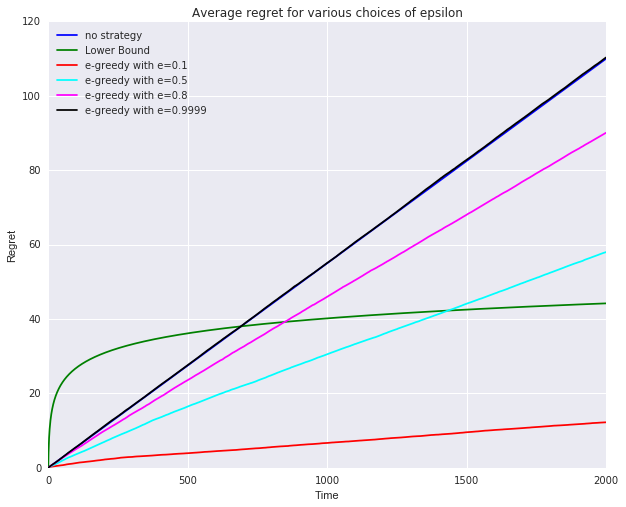

In [61]:
#  Epsilon-Greedy Approach

epsilon = np.array([0.1, 0.5, 0.8,0.9999])  # controls EpsilonGreedy policy

# cumRegret strores the cumulated regret for each strategy
cumRegret = np.zeros((np.size(epsilon), horizon))
i = 0
for eps in epsilon:
    print('Epsilon Greedy strategy with epsilon ' + str(eps))

    for exp in np.arange(nMC):
        # Initialize statistics
        draws = np.zeros(n_arms)
        rewards = np.zeros(n_arms)
        regret = np.zeros(horizon)

        for t in time:
            arm_chosen = eGreedy(n_arms, eps, rewards, draws)
            # arm_chosen = UCB(t, rewards, draws)
            # arm_chosen = Thompson(n_arms, rewards, draws)

            draws[arm_chosen] += 1
            reward = float(random() < true_means[arm_chosen])
            rewards[arm_chosen] += reward
            regret[t] = np.max(true_means) - true_means[arm_chosen]  # exp. regret
        cumRegret[i, :] += np.cumsum(regret)
    i += 1
avgRegret = cumRegret / nMC

if graphic:
    plt.figure(figsize=(10,8))
    plt.plot(linUB, color=colors[0], label='no strategy')
    plt.plot(logLB, color=colors[1], label='Lower Bound')
    for i in np.arange(np.size(epsilon)):
        plt.plot(avgRegret[i, :], color=colors[i + 2],
                 label='e-greedy with e=' + str(epsilon[i]))
    plt.xlabel('Time')
    plt.ylabel('Regret')
    plt.legend(loc=0)
    plt.title('Average regret for various choices of epsilon')
    plt.show()

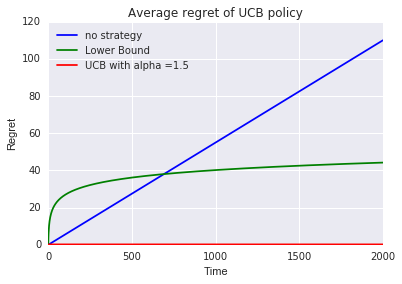

In [62]:
# Upper Confidence Bounds Approach :

# choice of alpha
alpha = 1.5

# cumRegret strores the cumulated regret for each strategy
cumRegret = np.zeros(horizon)

for exp in np.arange(nMC):
    # Initialize statistics
    draws = np.zeros(n_arms)
    rewards = np.zeros(n_arms)
    regret = np.zeros(horizon)

    for t in time:
        arm_chosen = UCB(t, alpha, rewards, draws)
        # arm_chosen = Thompson(n_arms, rewards, draws)

        draws[arm_chosen] += 1
        reward = float(random() < true_means[arm_chosen])
        rewards[arm_chosen] += reward
        regret[t] = np.max(true_means) - true_means[arm_chosen]  # exp. regret
    cumRegret += np.cumsum(regret)

avgRegret = cumRegret / nMC

if graphic:
    plt.figure()
    plt.plot(linUB, color=colors[0], label='no strategy')
    plt.plot(logLB, color=colors[1], label='Lower Bound')
    plt.plot(avgRegret, color=colors[2], label='UCB with alpha =' + str(alpha))
    plt.xlabel('Time')
    plt.ylabel('Regret')
    plt.legend(loc=0)
    plt.title('Average regret of UCB policy')
    plt.show()

In [26]:
# Thompson Sampling Approach :

# cumRegret strores the cumulated regret for each strategy
cumRegret = np.zeros(horizon)

for exp in np.arange(nMC):
    # Initialize statistics
    draws = np.zeros(n_arms)
    rewards = np.zeros(n_arms)
    regret = np.zeros(horizon)

    for t in time:
        arm_chosen = Thompson(n_arms, rewards, draws)

        draws[arm_chosen] += 1
        reward = float(random() < true_means[arm_chosen])
        rewards[arm_chosen] += reward
        regret[t] = np.max(true_means) - true_means[arm_chosen]  # exp. regret
    cumRegret += np.cumsum(regret)

avgRegret = cumRegret / nMC

if graphic:
    plt.figure()
    # plt.plot(linUB, color=colors[0], label='no strategy')
    plt.plot(logLB, color=colors[1], label='Lower Bound')
    plt.plot(avgRegret, color=colors[2], label='Thompson Sampling')
    plt.xlabel('Time')
    plt.ylabel('Regret')
    plt.legend(loc=0)
    plt.title('Average regret of Thompson Sampling policy')
    plt.show()

/Users/Bense/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


ValueError: setting an array element with a sequence.

In [ ]:
# Comparing policies
    # TODO